In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('./wowbgs.csv')
df.head(10)

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
0,WG,WG1,Horde,Hunter,1,3,14,48155,6641,532,1.0,NaN,dps,NaN
1,WG,WG1,Horde,Death Knight,1,3,12,27025,7106,377,1.0,NaN,dps,NaN
2,WG,WG1,Alliance,Paladin,0,1,19,824,93879,252,NaN,1.0,heal,NaN
3,WG,WG1,Alliance,Paladin,1,2,25,7046,98599,274,NaN,1.0,heal,NaN
4,WG,WG1,Alliance,Rogue,2,3,23,65483,19629,268,NaN,1.0,dps,NaN
5,WG,WG1,Horde,Druid,4,5,12,31759,6071,531,1.0,NaN,dps,NaN
6,WG,WG1,Horde,Shaman,0,4,18,12933,94587,541,1.0,NaN,heal,NaN
7,WG,WG1,Alliance,Priest,9,5,24,123000,34687,269,NaN,1.0,dps,NaN
8,WG,WG1,Horde,Druid,2,1,9,13900,2438,523,1.0,NaN,dps,NaN
9,WG,WG1,Alliance,Priest,0,1,25,12566,36734,276,NaN,1.0,heal,NaN


In [3]:
df.drop(['Battleground', 'Code', 'Faction', 'Win', 'Lose','Rol', 'BE'], axis=1, inplace=True)

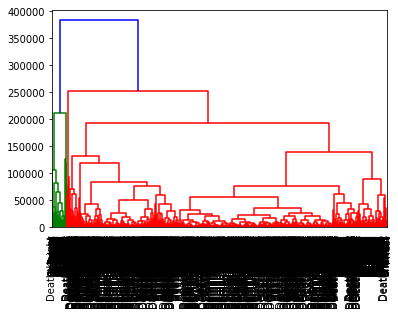

CPU times: user 1min 12s, sys: 3.65 s, total: 1min 16s
Wall time: 1min 17s


In [4]:
%%time
from scipy.cluster.hierarchy import linkage, dendrogram
varieties = list(df.pop('Class'))
samples = df.values
mergings = linkage(samples, method='complete')
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=10,
           ) 
plt.show()

In [5]:
model = KMeans(n_clusters=3)
model.fit(df)
all_predictions = model.predict(df)
print(all_predictions)

[0 0 1 ... 0 0 1]


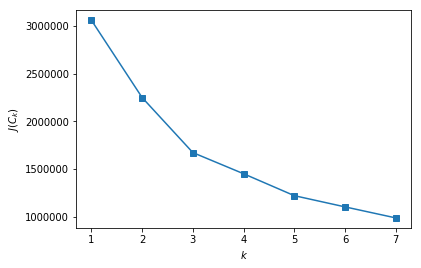

In [6]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

CPU times: user 316 ms, sys: 0 ns, total: 316 ms
Wall time: 310 ms


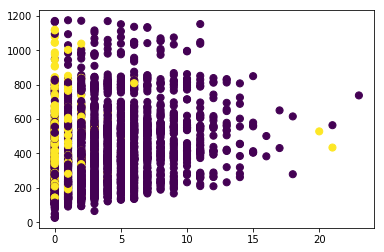

In [13]:
%%time
X=df[['KB', 'D', 'HK', 'DD', 'HD', 'Honor']].values
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 5], c=labels,
            s=50, cmap='viridis');

CPU times: user 382 ms, sys: 6.13 ms, total: 388 ms
Wall time: 322 ms


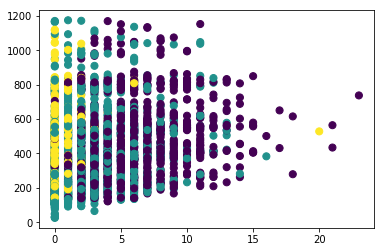

In [14]:
%%time
X=df[['KB', 'D', 'HK', 'DD', 'HD', 'Honor']].values
labels = KMeans(3, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 5], c=labels,
            s=50, cmap='viridis');

CPU times: user 502 ms, sys: 5.98 ms, total: 508 ms
Wall time: 438 ms


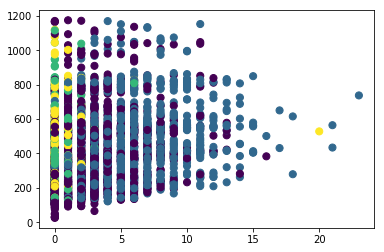

In [16]:
%%time
X=df[['KB', 'D', 'HK', 'DD', 'HD', 'Honor']].values
labels = KMeans(4, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 5], c=labels,
            s=50, cmap='viridis');

CPU times: user 535 ms, sys: 17 µs, total: 535 ms
Wall time: 448 ms


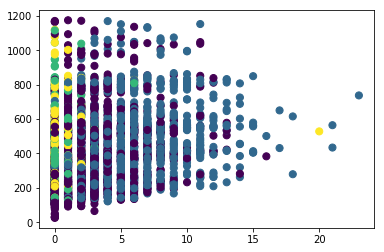

In [12]:
%%time
X=df[['KB', 'D', 'HK', 'DD', 'HD', 'Honor']].values
labels = KMeans(4, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 5], c=labels,
            s=50, cmap='viridis');

CPU times: user 453 ms, sys: 7.62 ms, total: 460 ms
Wall time: 456 ms


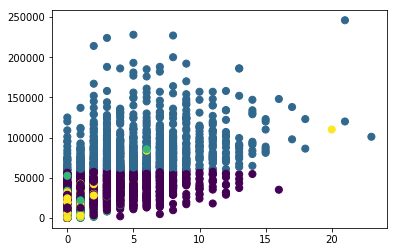

In [17]:
%%time
X=df[['KB', 'D', 'HK', 'DD', 'HD', 'Honor']].values
labels = KMeans(4, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 3], c=labels,
            s=50, cmap='viridis');

CPU times: user 479 ms, sys: 5.41 ms, total: 485 ms
Wall time: 368 ms


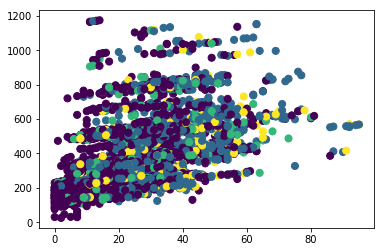

In [18]:
%%time
X=df[['KB', 'D', 'HK', 'DD', 'HD', 'Honor']].values
labels = KMeans(4, random_state=0).fit_predict(X)
plt.scatter(X[:, 2], X[:, 5], c=labels,
            s=50, cmap='viridis');

In [24]:
%%time
y=df['Honor']
X=df.drop(['Honor'],axis=1)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

CPU times: user 53 ms, sys: 7.13 ms, total: 60.1 ms
Wall time: 67.5 ms


Meaning of the 2 components:
-0.000 x KB + -0.000 x D + 0.000 x HK + -0.494 x DD + 0.870 x HD
0.000 x KB + 0.000 x D + 0.000 x HK + 0.870 x DD + 0.494 x HD


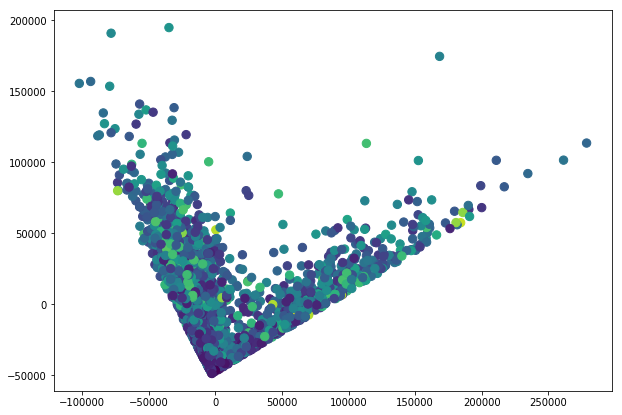

In [25]:
print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            list(X.columns.values))))
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=70, cmap='viridis')
plt.show()

In [26]:
%%time
y=df['Honor']
X=df.drop(['Honor'],axis=1)
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

CPU times: user 14.7 ms, sys: 0 ns, total: 14.7 ms
Wall time: 10.5 ms


Meaning of the 3 components:
-0.000 x KB + -0.000 x D + 0.000 x HK + -0.494 x DD + 0.870 x HD
0.000 x KB + 0.000 x D + 0.000 x HK + 0.870 x DD + 0.494 x HD
0.076 x KB + -0.033 x D + 0.997 x HK + -0.000 x DD + -0.000 x HD


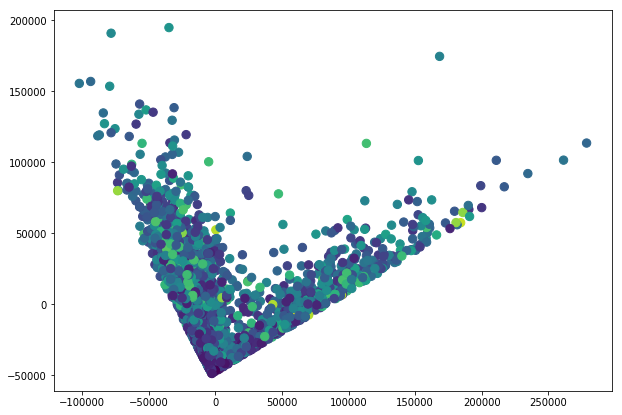

In [27]:
print("Meaning of the 3 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            list(X.columns.values))))
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=70, cmap='viridis')
plt.show()

In [28]:
y=df['Honor']+df['HK']+df['KB']
X=df.drop(['Honor','HK','KB'],axis=1)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

Meaning of the 2 components:
-0.000 x D + -0.494 x DD + 0.870 x HD
0.000 x D + 0.870 x DD + 0.494 x HD


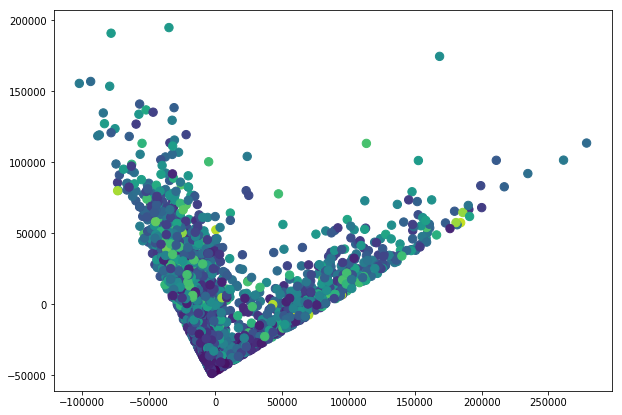

In [29]:
print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            list(X.columns.values))))
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=70, cmap='viridis')
plt.show()

In [30]:
%%time
y=df['Honor']+df['HK']+df['KB']
X=df.drop(['Honor','HK','KB'],axis=1)
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

CPU times: user 6.84 ms, sys: 0 ns, total: 6.84 ms
Wall time: 46.4 ms


Meaning of the 3 components:
-0.000 x D + -0.494 x DD + 0.870 x HD
0.000 x D + 0.870 x DD + 0.494 x HD
1.000 x D + -0.000 x DD + -0.000 x HD


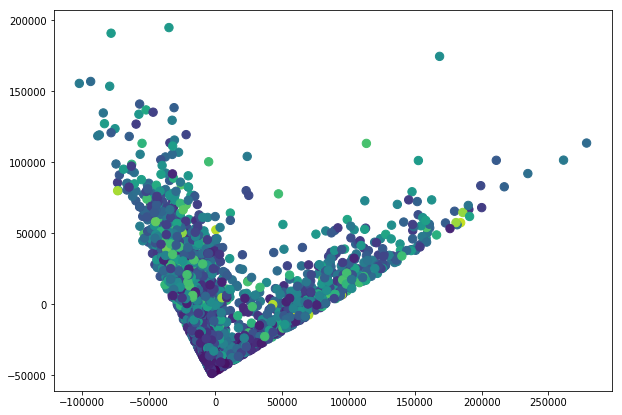

In [31]:
print("Meaning of the 3 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            list(X.columns.values))))
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=70, cmap='viridis')
plt.show()

In [33]:
df=pd.read_csv('./wowbgs.csv')
df.drop(['Battleground', 'Code', 'Faction', 'Class', 'Win', 'Lose','Rol', 'BE'], axis=1, inplace=True)
model = TSNE(learning_rate=100)
transformed = model.fit_transform(df)

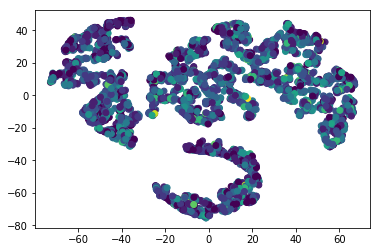

In [35]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
 
plt.scatter(x_axis, y_axis, c=df.pop('D'))
plt.show()

In [36]:
df=pd.read_csv('./wowbgs.csv')
df.drop(['Battleground', 'Code', 'Faction', 'Class', 'Win', 'Lose','Rol', 'BE'], axis=1, inplace=True)
model = TSNE(learning_rate=100)
transformed = model.fit_transform(df)

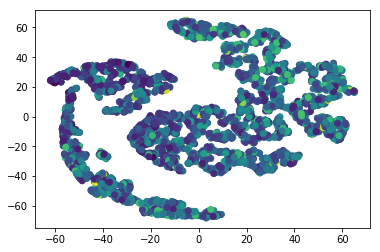

In [37]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
 
plt.scatter(x_axis, y_axis, c=df.pop('Honor'))
plt.show()

In [38]:
df=pd.read_csv('./wowbgs.csv')
df.drop(['Battleground', 'Code', 'Faction', 'Class', 'Win', 'Lose','Rol', 'BE'], axis=1, inplace=True)
model = TSNE(learning_rate=100)
transformed = model.fit_transform(df)

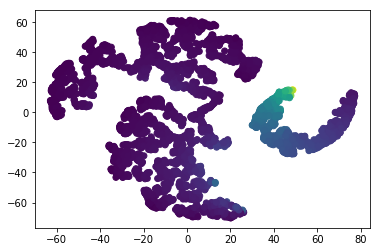

In [39]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
 
plt.scatter(x_axis, y_axis, c=df.pop('HD'))
plt.show()

In [40]:
df=pd.read_csv('./wowbgs.csv')
df.drop(['Battleground', 'Code', 'Faction', 'Class', 'Win', 'Lose','Rol', 'BE'], axis=1, inplace=True)
model = TSNE(learning_rate=100)
transformed = model.fit_transform(df)

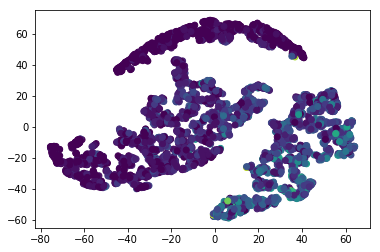

In [41]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
 
plt.scatter(x_axis, y_axis, c=df.pop('KB'))
plt.show()

In [42]:
df=pd.read_csv('./wowbgs.csv')
df.drop(['Battleground', 'Code', 'Faction', 'Class', 'Win', 'Lose','Rol', 'BE'], axis=1, inplace=True)
model = TSNE(learning_rate=10)
transformed = model.fit_transform(df)

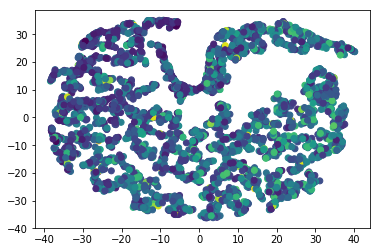

In [43]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
 
plt.scatter(x_axis, y_axis, c=df.pop('Honor'))
plt.show()

In [45]:
%%time
df=pd.read_csv('./wowbgs.csv')
df.drop(['Battleground', 'Code', 'Faction', 'Class', 'Win', 'Lose','Rol', 'BE'], axis=1, inplace=True)
model = TSNE(learning_rate=1000)
transformed = model.fit_transform(df)

CPU times: user 59.5 s, sys: 214 ms, total: 59.7 s
Wall time: 1min 1s


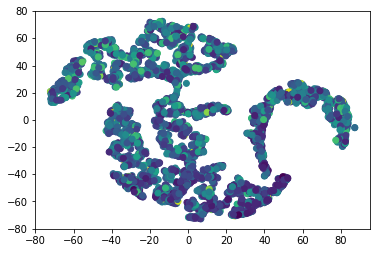

In [46]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
 
plt.scatter(x_axis, y_axis, c=df.pop('Honor'))
plt.show()